<a href="https://colab.research.google.com/github/EmmanueDavidL/Ciencia_De_Datos2025/blob/main/Archivo_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PUUID: cYv8MNu1wzYTu6oDoMRB6nLFz9s3JTRS73VqVsHAx7ONs9Oz3O_tNjAYEM4Lf2DdYlwLvdMGQNlxbg
Número de partidas obtenidas: 30
           Partida   Campeón  Kills  Deaths  Assists   KDA   CS  \
0   LA1_1652191389    Rengar     11       8        8  2.38  210   
1   LA1_1651681691  JarvanIV     11      10       22  3.30  198   
2   LA1_1651586195  JarvanIV      9       6        6  2.50  129   
3   LA1_1651573327  JarvanIV      3       7       15  2.57  198   
4   LA1_1651374879  JarvanIV      7       5       15  4.40  177   
5   LA1_1651020862  JarvanIV      4       8       21  3.12  178   
6   LA1_1650403747    Graves     14       4        8  5.50  220   
7   LA1_1650364765  JarvanIV      7       4        7  3.50  160   
8   LA1_1649935724    Rengar      9       6        7  2.67  148   
9   LA1_1649893349    Lillia     13       8        8  2.62  250   
10  LA1_1649853081    Rengar     10       7        9  2.71  139   
11  LA1_1649349658    Rengar     10       4        7  4.25  139   
12  LA1_16

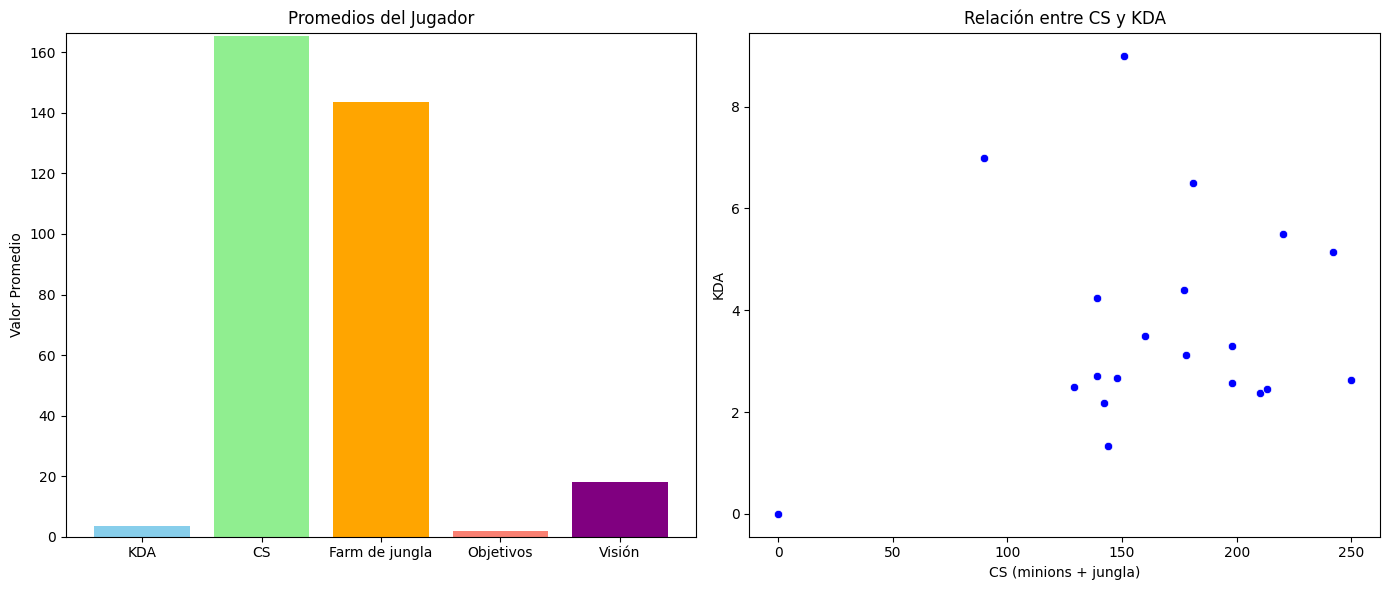

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuración
API_KEY = "RGAPI-4a513307-4c83-48fe-9602-c91405b3d98a"
riot_name = "Rerzd"
riot_tag = "LAN"

# 2. PUUID del jugador
url_account = f"https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{riot_name}/{riot_tag}?api_key={API_KEY}"
resp = requests.get(url_account).json()

# Verificar errores en la respuesta
if "status" in resp:
    print(f"Error: {resp['status']['message']} (Status Code: {resp['status']['status_code']})")
else:
    puuid = resp["puuid"]
    print("PUUID:", puuid)

    # 3. IDs de partidas recientes (últimas 30 partidas)
    url_matches = f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=0&count=30&api_key={API_KEY}"
    matches = requests.get(url_matches).json()

    print("Número de partidas obtenidas:", len(matches))

    # 4. Estadísticas de cada partida
    data = []

    for match_id in matches:
        url_match = f"https://americas.api.riotgames.com/lol/match/v5/matches/{match_id}?api_key={API_KEY}"
        match_data = requests.get(url_match).json()

        # Buscar al jugador en la partida
        for player in match_data["info"]["participants"]:
            if player["puuid"] == puuid:
                # Verificar si el rol del jugador es "Jungler"
                if player["teamPosition"] == "JUNGLE":
                    stats = {
                        "Partida": match_id,
                        "Campeón": player["championName"],
                        "Kills": player["kills"],
                        "Deaths": player["deaths"],
                        "Assists": player["assists"],
                        "KDA": round((player["kills"] + player["assists"]) / (player["deaths"] if player["deaths"] > 0 else 1), 2),
                        "CS": player["totalMinionsKilled"] + player.get("neutralMinionsKilled", 0),
                        "Farm de jungla": player.get("neutralMinionsKilled", 0),
                        "Objetivos": player.get("dragonKills", 0) + player.get("baronKills", 0) + player.get("riftHeraldKills", 0),
                        "Visión": player["visionScore"],
                        "Daño infligido": player["totalDamageDealtToChampions"],
                        "Daño recibido": player["totalDamageTaken"],
                        "Resultado": "Victoria" if player["win"] else "Derrota"
                    }
                    data.append(stats)

    # 5. Convertir a DataFrame y mostrar
    df = pd.DataFrame(data)
    print(df)

    # 6. Resumen general
    avg_kda = round(df["KDA"].mean(), 2)
    avg_cs = round(df["CS"].mean(), 2)
    avg_farm_jungla = round(df["Farm de jungla"].mean(), 2)
    avg_objetivos = round(df["Objetivos"].mean(), 2)
    avg_vision = round(df["Visión"].mean(), 2)
    most_played = df["Campeón"].value_counts().index[0]

    print("\n=== RESUMEN GENERAL ===")
    print("Promedio de KDA:", avg_kda)
    print("Promedio de CS:", avg_cs)
    print("Promedio de farm de jungla:", avg_farm_jungla)
    print("Promedio de objetivos (dragones, barones, heraldos):", avg_objetivos)
    print("Promedio de visión:", avg_vision)
    print("Campeón más jugado:", most_played)

    # 7. Generar informe de mejora
    print("\n=== INFORME DE MEJORA ===")
    if avg_kda < 2:
        print("- Tu KDA es bajo. Necesitas mejorar tu posicionamiento y la toma de decisiones en peleas.")
    elif avg_kda < 4:
        print("- Tu KDA es decente, pero puedes mejorar con un mejor control de la jungla.")
    else:
        print("- Muy buen KDA, manejas bien el riesgo y las peleas.")

    if avg_farm_jungla < 50:
        print("- Tu farm en la jungla es bajo. Trabaja en mejorar el clear de campamentos.")
    elif avg_farm_jungla < 100:
        print("- Tu farm en la jungla es decente, pero puedes optimizar los tiempos de rotación.")
    else:
        print("- Muy buen farm en la jungla, controlas bien los recursos.")

    if avg_objetivos < 1:
        print("- Estás asegurando pocos objetivos en el mapa. Trabaja en coordinarte mejor con tu equipo para los dragones y barones.")
    elif avg_objetivos < 2:
        print("- Aseguras objetivos, pero aún puedes mejorar tu control sobre los mismos.")
    else:
        print("- Excelente control de objetivos. Estás jugando como un jungler eficiente.")

    if avg_vision < 20:
        print("- Tu visión es baja. Coloca más wards en la jungla para proporcionar información a tu equipo.")
    elif avg_vision < 40:
        print("- Tu visión es aceptable, pero puedes mejorar el control de la visión en la jungla y en objetivos clave.")
    else:
        print("- Muy buen uso de visión. Tu equipo tiene buena información sobre el mapa.")

    print(f"- Tu campeón más jugado es **{most_played}**. Especialízate en dominarlo aún más o trabaja en un pool de junglas flexibles.")

    # 8. Visualización de gráficas

    # Gráfica de barras: Promedios
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Promedio de KDA, CS, Visión
    ax[0].bar(["KDA", "CS", "Farm de jungla", "Objetivos", "Visión"], [avg_kda, avg_cs, avg_farm_jungla, avg_objetivos, avg_vision], color=["skyblue", "lightgreen", "orange", "salmon", "purple"])
    ax[0].set_title("Promedios del Jugador")
    ax[0].set_ylabel("Valor Promedio")
    ax[0].set_ylim(0, max([avg_kda, avg_cs, avg_farm_jungla, avg_objetivos, avg_vision]) + 1)

    # Gráfica de dispersión: CS vs KDA
    sns.scatterplot(data=df, x="CS", y="KDA", ax=ax[1], color="blue")
    ax[1].set_title("Relación entre CS y KDA")
    ax[1].set_xlabel("CS (minions + jungla)")
    ax[1].set_ylabel("KDA")

    plt.tight_layout()
    plt.show()



In [16]:
import numpy as np

def create_advanced_visualizations(df):
    plt.style.use('default')
    sns.set_palette("Set2")
    fig = plt.figure(figsize=(20, 16))
    # 1. Performance Radar Chart (KDA, CS/min, Vision/min, Objectives, Kill Participation, Damage/min)
    ax1 = plt.subplot(2, 3, 1, projection='polar')
    metrics = {
        'KDA': min(df['KDA'].mean() * 2, 10),
        'CS/min': min(df['CS'].mean() / 1.0, 10),
        'Vision/min': min(df['Visión'].mean() * 4, 10),
        'Objectives': min(df['Objetivos'].mean() * 3, 10),
        # 'Kill Participation': min(df['kill_participation'].mean() / 10, 10),
        # 'Damage/min': min(df['damage_per_min'].mean() / 100, 10)
    }
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False)
    values = list(metrics.values())
    values += values[:1]
    angles = np.concatenate((angles, [angles[0]]))
    ax1.plot(angles, values, 'o-', linewidth=2, label='Performance')
    ax1.fill(angles, values, alpha=0.25)
    ax1.set_xticks(angles[:-1])
    ax1.set_xticklabels(metrics.keys())
    ax1.set_ylim(0, 10)
    ax1.set_title('Performance Radar\n(Higher = Better)', size=12, weight='bold')
    ax1.grid(True)

    plt.tight_layout()
    plt.show()

    if df.empty:
        print("No jungle games found in the last 30 matches.")

/tmp/ipython-input-3372208202.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Win Rate (%)", y="Campeón", data=win_rate_by_champion.sort_values(by="Win Rate (%)", ascending=False), ax=ax5, palette="viridis")


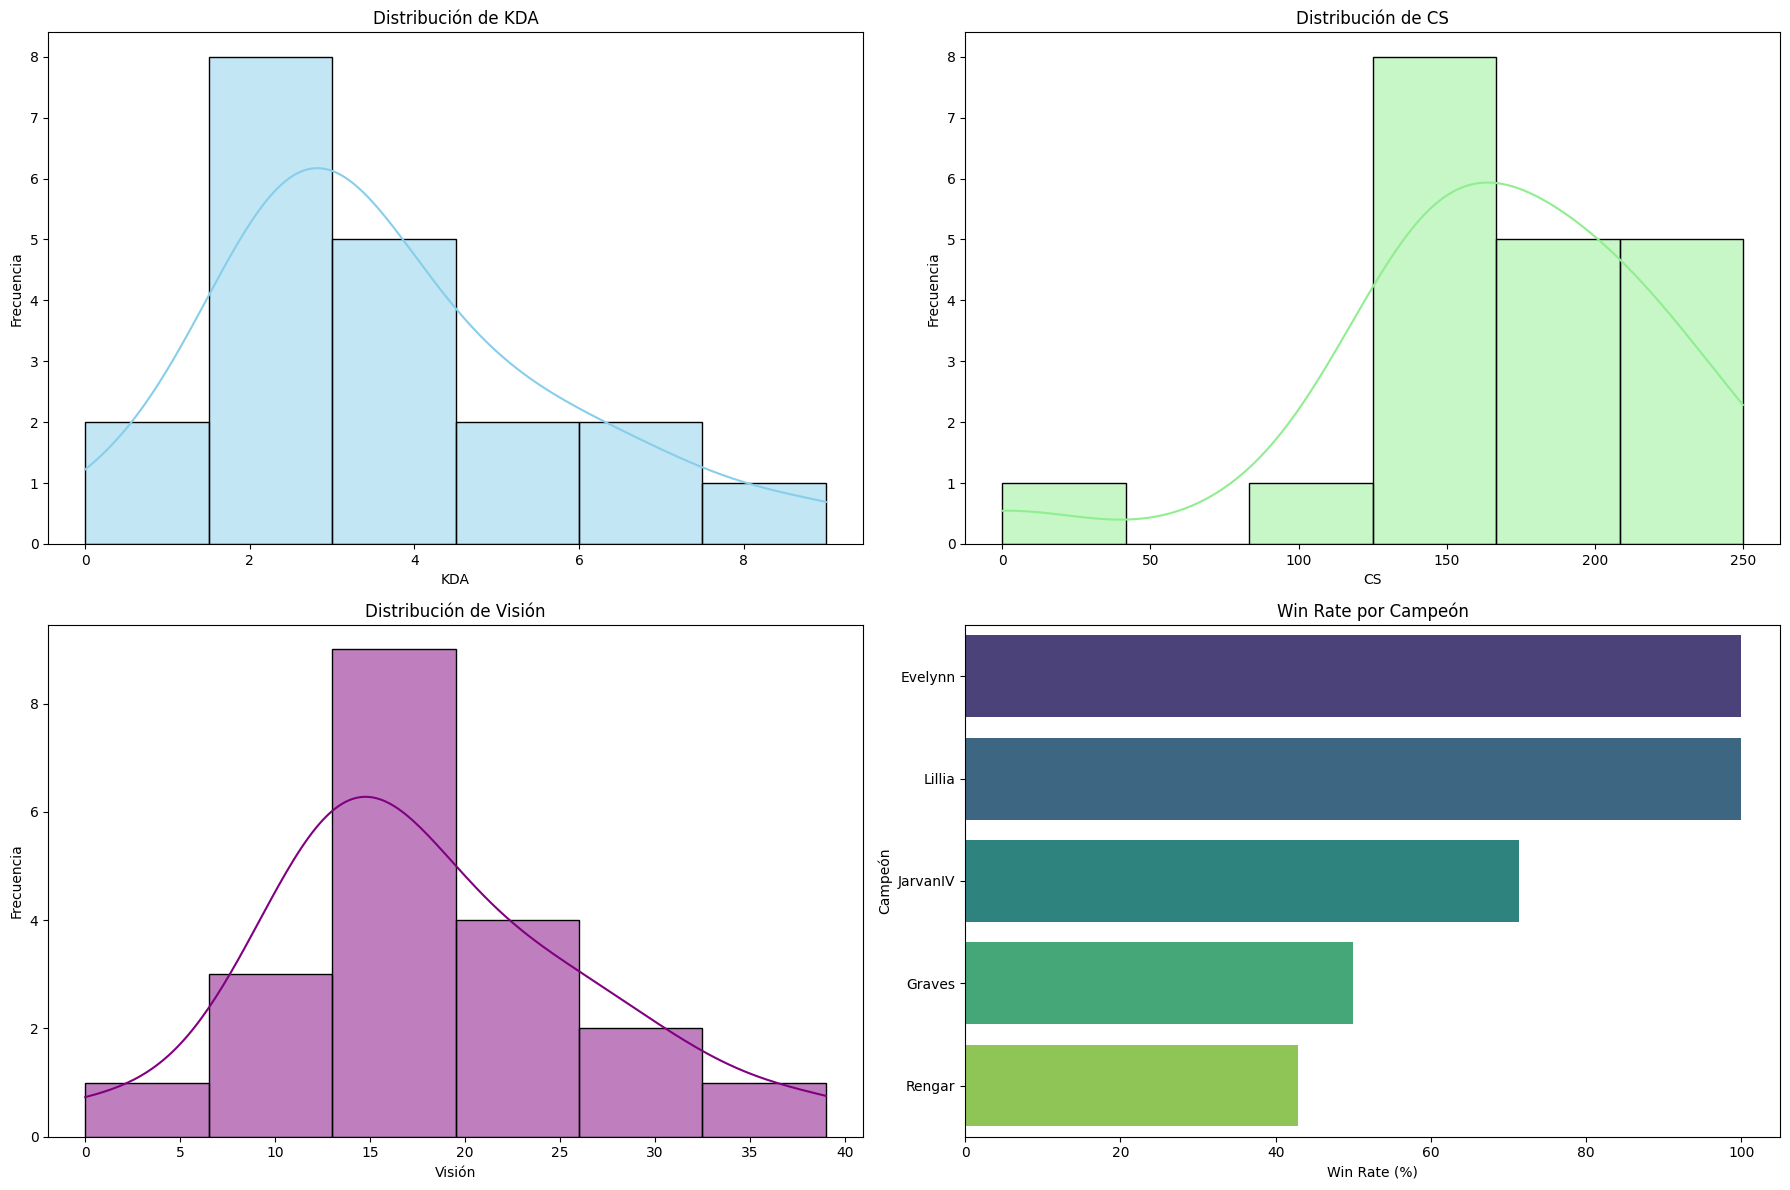

In [17]:
def create_additional_visualizations(df):
    plt.style.use('default')
    sns.set_palette("Set2")
    fig = plt.figure(figsize=(18, 12))

    # 2. Distributions of KDA, CS, Vision
    ax2 = plt.subplot(2, 2, 1)
    sns.histplot(df["KDA"], kde=True, ax=ax2, color="skyblue")
    ax2.set_title("Distribución de KDA")
    ax2.set_xlabel("KDA")
    ax2.set_ylabel("Frecuencia")

    ax3 = plt.subplot(2, 2, 2)
    sns.histplot(df["CS"], kde=True, ax=ax3, color="lightgreen")
    ax3.set_title("Distribución de CS")
    ax3.set_xlabel("CS")
    ax3.set_ylabel("Frecuencia")

    ax4 = plt.subplot(2, 2, 3)
    sns.histplot(df["Visión"], kde=True, ax=ax4, color="purple")
    ax4.set_title("Distribución de Visión")
    ax4.set_xlabel("Visión")
    ax4.set_ylabel("Frecuencia")

    # 3. Win Rate by Champion
    win_rate_by_champion = df.groupby("Campeón")["Resultado"].apply(lambda x: (x == "Victoria").sum() / len(x) * 100).reset_index(name="Win Rate (%)")
    ax5 = plt.subplot(2, 2, 4)
    sns.barplot(x="Win Rate (%)", y="Campeón", data=win_rate_by_champion.sort_values(by="Win Rate (%)", ascending=False), ax=ax5, palette="viridis", hue="Campeón", legend=False)
    ax5.set_title("Win Rate por Campeón")
    ax5.set_xlabel("Win Rate (%)")
    ax5.set_ylabel("Campeón")

    plt.tight_layout()
    plt.show()

create_additional_visualizations(df)